# **Part B Solutions Notebook** 
Required packages are imported using the below code:

In [24]:
from IPython.display import Image,display,HTML
import cv2
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
import numpy as np
import math

## **Question 1** 
Original image is read, transformed into greyscale and flattened version of it is created by the code below.

In [25]:
image = cv2.imread('surfacePic.jpg')
Image(filename='surfacePic.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_vector=gray.flatten()

The greyscale image is saved and displayed.

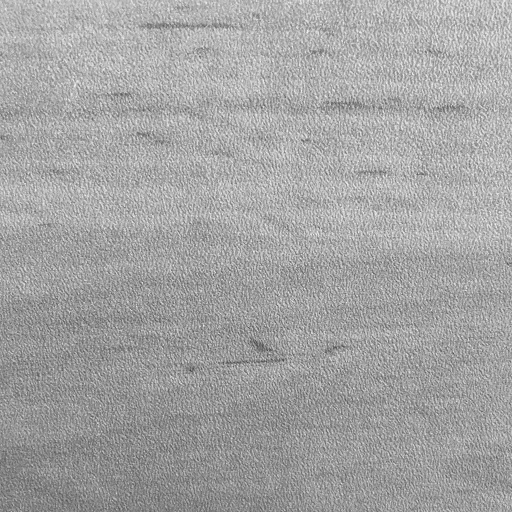

In [26]:
cv2.imwrite('surfacePic_gray.jpg', gray) 
Image(filename='surfacePic_gray.jpg')

Histogram of the pixel values(intensities) are drawn by the code below and the normal distribution seems like it would fit well to the shape of the histogram.

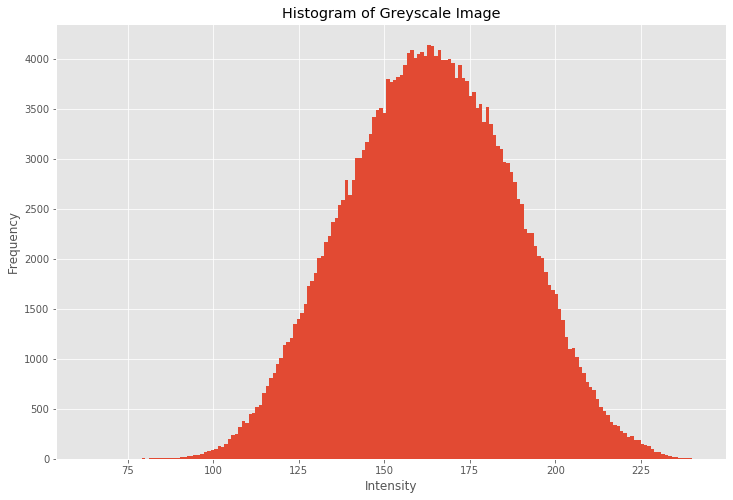

In [27]:
plt.figure(figsize=[12,8])
plt.style.use('ggplot')
plt.hist(gray_vector,bins=177)
plt.title('Histogram of Greyscale Image')
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.show()


## **Question 2**
Normal distribution's parameters are estimated by "norm.fit" function and the estimated pdf is drawn on top of the histogram by the code below.

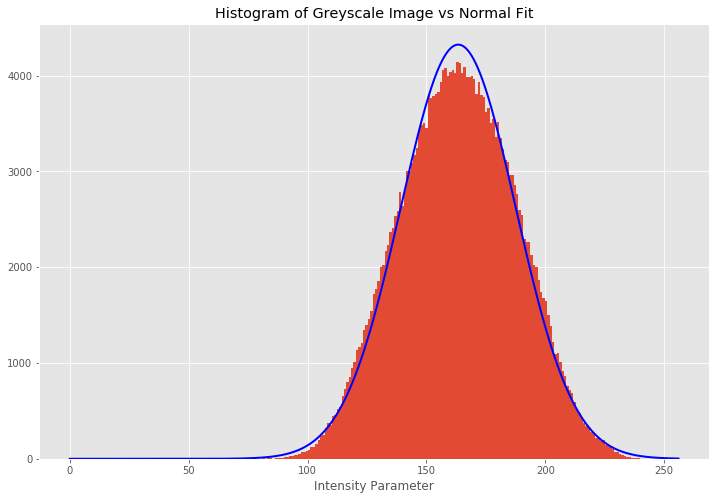

In [28]:
plt.figure(figsize=[12,8])
plt.style.use('ggplot')
plt.hist(gray_vector,bins=177)
plt.title('Histogram of Greyscale Image vs Normal Fit')
plt.xlabel('Intensity Parameter')
mu,std = norm.fit(gray_vector)
xmin=0
xmax=256
x = np.linspace(xmin, xmax, 10000)
p = norm.pdf(x, mu, std)
plt.plot(x, p*len(gray_vector), 'b', linewidth=2)
plt.show()

## **Question 3**
Lower and upper bounds are found by "norm.ppf" function which is the inverse cdf function.<br> 
After finding the coordinates for outliers, they are replaced with black pixels and the resulting image is saved as "surfacePic_new_gray" and displayed (upper image) alongside the original greyscale image (lower image). <br> 
The process captures the brightest and the darkest pixels (outliers) and replaces them with a black pixel, since the process didn't find significant <br>
number of outliers the modified image and the original greyscale image looks very much alike. This result shows that the intensity of the pixels of the <br>
original greyscale image approximately follows normal distribution with parameters "mu" and "std".

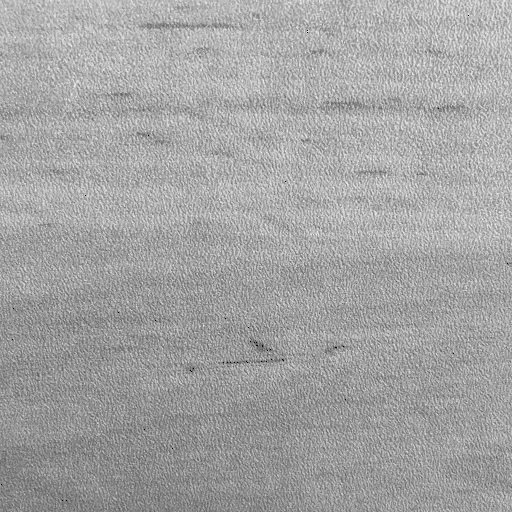

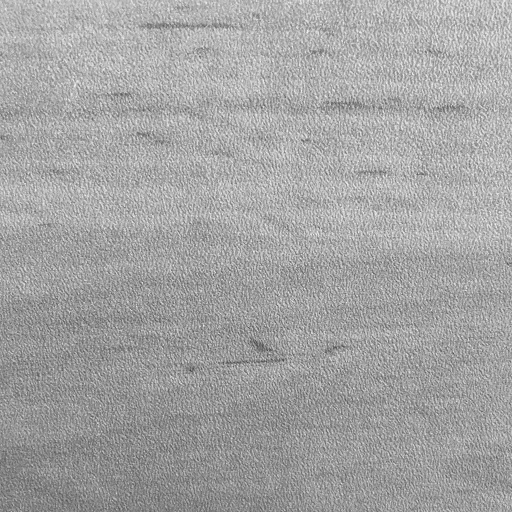

In [29]:
lower=norm.ppf(0.001,loc=mu,scale=std)
upper=norm.ppf(0.999,loc=mu,scale=std)
outliers=np.where((gray>upper)|(gray<lower))
new_gray=np.copy(gray)
for i in range(len(outliers[0])):
    new_gray[outliers[0][i],outliers[1][i]]=0
cv2.imwrite('surfacePic_new_gray.jpg', new_gray)
display(Image(filename='surfacePic_new_gray.jpg'),Image(filename='surfacePic_gray.jpg'))


## **Question 4** 
Same procedure is followed for each patch of the original greyscale image by the below code.

In [30]:
final_gray=gray #initialization of final output
starting_x=0 #initialization of starting x coordinate
starting_y=0 #initialization of starting y coordinate
for i in range(math.floor(len(gray[0])*len(gray[1])/(51*51))): #repeating the process for total number of patches(last 2 pixels isn't considered)
    gray_patch=gray[starting_x:(starting_x+51),starting_y:(starting_y+51)] #selecting the patch
    mu,std = norm.fit(gray_patch)                   #finding the mean and the standard deviation of the patch
    lower=norm.ppf(0.001,loc=mu,scale=std)                  #finding the lower bound of the patch
    upper=norm.ppf(0.999,loc=mu,scale=std)                  #finding the upper bound of the patch
    outliers=np.where((gray_patch>upper)|(gray_patch<lower))        #finding the outliers of the patch
    for i in range(len(outliers[0])):                           #replacing the outliers with 0
        gray_patch[outliers[0][i],outliers[1][i]]=0
    final_gray[starting_x:(starting_x+51),starting_y:(starting_y+51)]=gray_patch[0:51,0:51] #inserting the modified patch into final output
    starting_x=starting_x+51
    if starting_x==510:
        starting_y=starting_y+51
        starting_x=0
        if starting_y==510:
            break

In [31]:
len(np.where(final_gray==0)[0]) #total number of outliers(black pixels)

276

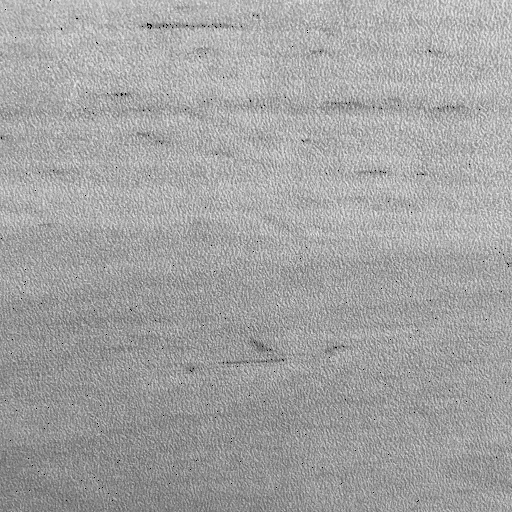

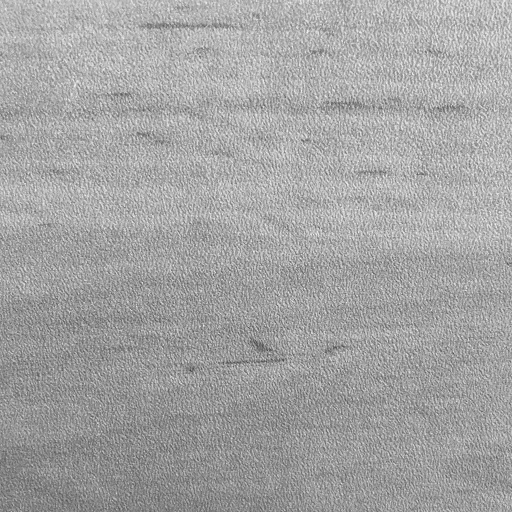

In [32]:
cv2.imwrite('surfacePic_final_gray.jpg', final_gray)
display(Image(filename='surfacePic_final_gray.jpg'),Image(filename='surfacePic_gray.jpg'))

The process captures the brightest and the darkest pixels (outliers) in each patch and replaces them with a black pixel, since the process <br>
didn't find significant number of outliers (276 at total) the modified image (upper image) and the original greyscale image looks very much alike. <br>
However, compared to the process in Question 3 it did find higher number of outliers which is expected because higher number of samples (pixels) in the <br>
original greyscale image would result in better normal fit and less outliers. (black pixels) When we search for outliers in each patch the effect of the <br>
brightest and the darkest pixels (outliers) increases and we detect outliers which we wouldn't detect in the whole image.